In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/traffic-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 277k/277k [00:00<00:00, 23.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/traffic-prediction-dataset/versions/1


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('/content/traffic_.csv')

# Show basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Traffic Report ID  3999 non-null   object 
 1   Published Date     3999 non-null   object 
 2   Issue Reported     3999 non-null   object 
 3   Location           3993 non-null   object 
 4   Latitude           3999 non-null   float64
 5   Longitude          3999 non-null   float64
 6   Address            3999 non-null   object 
 7   Status             3999 non-null   object 
 8   Status Date        3999 non-null   object 
dtypes: float64(2), object(7)
memory usage: 281.3+ KB
None
  Traffic Report ID                Published Date  Issue Reported  \
0                A1  06/13/2018 06:35:59 AM +0000   Crash Service   
1                A2  06/13/2018 10:15:36 AM +0000  Traffic Hazard   
2                A3  04/17/2020 09:25:03 PM +0000    Crash Urgent   
3                A4  04/17/2020

In [ ]:
import pandas as pd

df = pd.read_csv("/content/traffic_.csv")

# Convert published and status date to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')
df['Status Date'] = pd.to_datetime(df['Status Date'], errors='coerce')

# Create features from date
df['hour'] = df['Published Date'].dt.hour
df['dayofweek'] = df['Published Date'].dt.dayofweek
df['month'] = df['Published Date'].dt.month

# Drop missing locations
df = df.dropna(subset=['Latitude', 'Longitude', 'Issue Reported'])

df.head()


,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,hour,dayofweek,month
0,A1,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,6,2,6
1,A2,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,10,2,6
2,A3,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,21,4,4
3,A4,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,21,4,4
4,A5,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,21,4,4


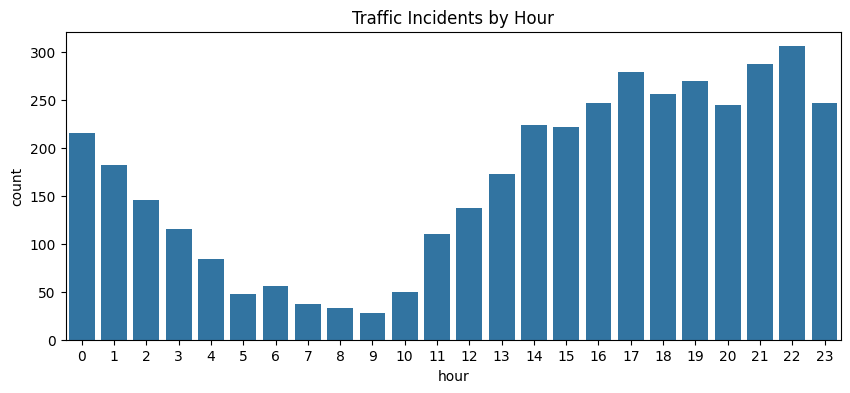

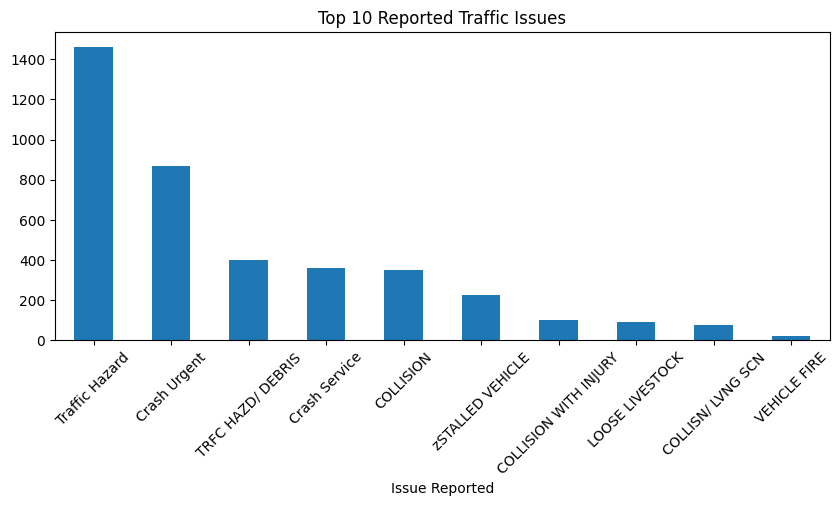

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Incidents by hour
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df)
plt.title("Traffic Incidents by Hour")
plt.show()

# Top 10 reported issues
plt.figure(figsize=(10, 4))
df['Issue Reported'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Reported Traffic Issues")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Count occurrences of each issue
issue_counts = df['Issue Reported'].value_counts()

# Keep only issues that appear at least 2 times
valid_issues = issue_counts[issue_counts >= 2].index
df = df[df['Issue Reported'].isin(valid_issues)]


In [ ]:
# Encode issue labels
le = LabelEncoder()
df['issue_encoded'] = le.fit_transform(df['Issue Reported'])

# Feature selection
features = ['hour', 'dayofweek', 'Latitude', 'Longitude']
X = df[features]
y = df['issue_encoded']

# Train-test split with stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


<ipython-input-13-e483f7bfb1d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_encoded'] = le.fit_transform(df['Issue Reported'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.4475

Classification Report:
                             precision    recall  f1-score   support

         BLOCKED DRIV/ HWY       0.00      0.00      0.00         2
             BOAT ACCIDENT       0.00      0.00      0.00         2
                 COLLISION       0.38      0.47      0.42        70
     COLLISION WITH INJURY       0.12      0.05      0.07        20
COLLISION/PRIVATE PROPERTY       0.00      0.00      0.00         3
         COLLISN/ LVNG SCN       0.00      0.00      0.00        15
             Crash Service       0.23      0.13      0.16        71
              Crash Urgent       0.39      0.39      0.39       174
           LOOSE LIVESTOCK       0.38      0.33      0.35        18
           Stalled Vehicle       0.00      0.00      0.00         3
         TRFC HAZD/ DEBRIS       0.46      0.42      0.44        80
            Traffic Hazard       0.54      0.70      0.61       293
              VEHICLE FIRE       0.00      0.00      0.00         4
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
predicted_issues = le.inverse_transform(y_pred[:5])
actual_issues = le.inverse_transform(y_test[:5])
coords = X_test[['Latitude', 'Longitude']].iloc[:5].values

for i in range(5):
    print(f"📍 Location: {coords[i]}")
    print(f"✅ Actual: {actual_issues[i]}")
    print(f"🔮 Predicted: {predicted_issues[i]}\n")


📍 Location: [ 30.267443 -97.757678]
✅ Actual: Traffic Hazard
🔮 Predicted: zSTALLED VEHICLE

📍 Location: [ 30.234103 -97.722846]
✅ Actual: Crash Urgent
🔮 Predicted: Crash Urgent

📍 Location: [ 30.565648 -97.889259]
✅ Actual: COLLISION
🔮 Predicted: TRFC HAZD/ DEBRIS

📍 Location: [ 30.229906 -97.788342]
✅ Actual: zSTALLED VEHICLE
🔮 Predicted: Traffic Hazard

📍 Location: [ 30.42803  -97.805714]
✅ Actual: Crash Urgent
🔮 Predicted: Crash Urgent



In [ ]:
# Example new report
new_data = pd.DataFrame([{
    'hour': 17,
    'dayofweek': 2,
    'Latitude': 30.2672,
    'Longitude': -97.7431
}])

# Predict issue
pred = model.predict(new_data)
print("Predicted traffic issue:", le.inverse_transform(pred)[0])


Predicted traffic issue: Traffic Hazard


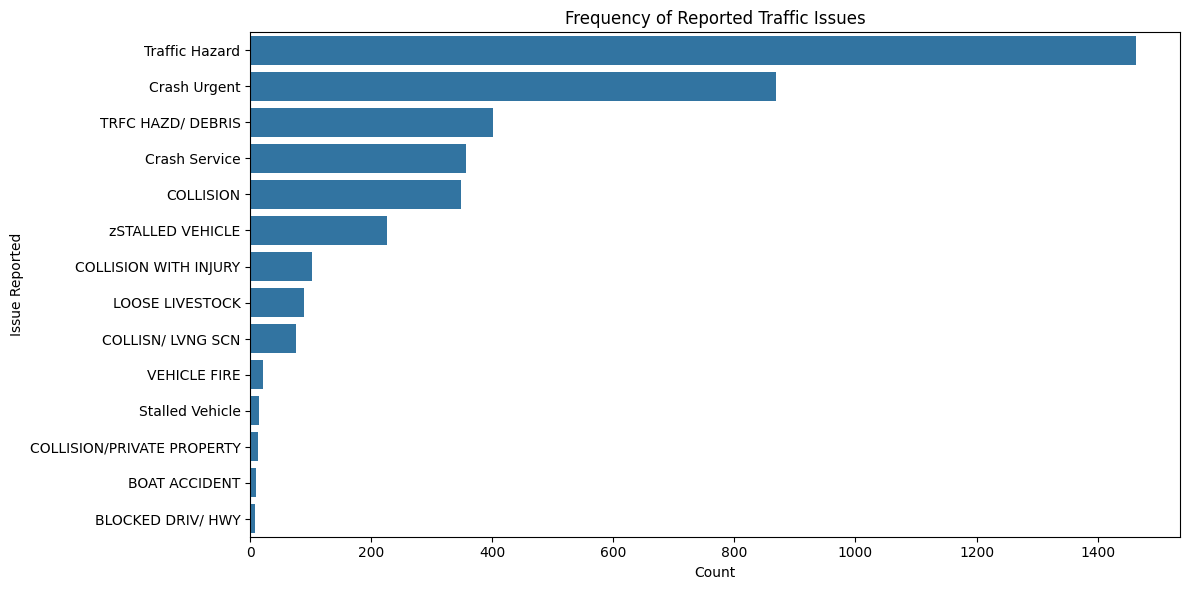

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Issue Reported', order=df['Issue Reported'].value_counts().index)
plt.title('Frequency of Reported Traffic Issues')
plt.xlabel('Count')
plt.ylabel('Issue Reported')
plt.tight_layout()
plt.show()


<ipython-input-18-5e0462df1b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Published Date'] = pd.to_datetime(df['Published Date'])


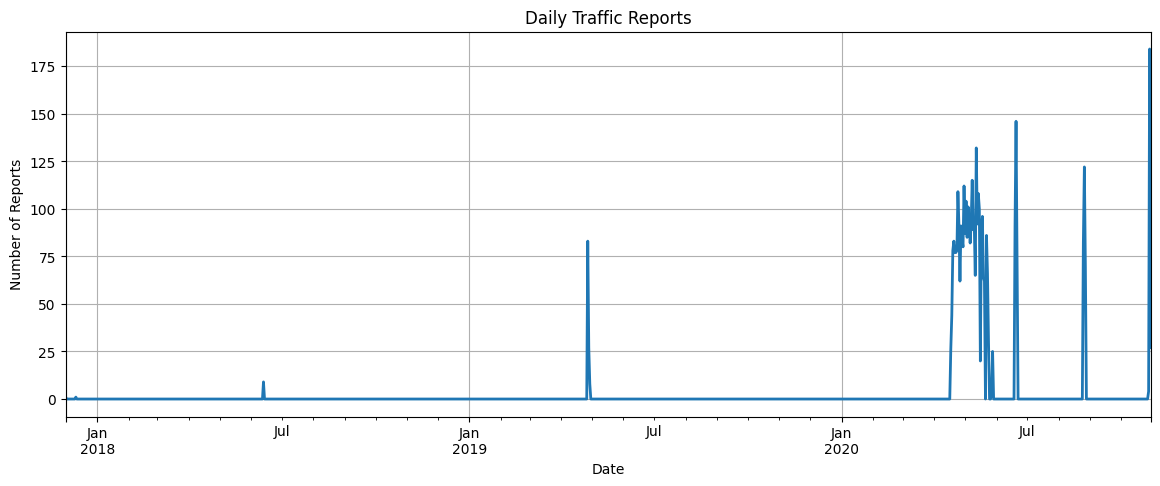

In [ ]:
df['Published Date'] = pd.to_datetime(df['Published Date'])

df.set_index('Published Date').resample('D').size().plot(figsize=(14, 5), lw=2)
plt.title('Daily Traffic Reports')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[30.2672, -97.7431], zoom_start=11)  # Austin center
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("heatmap.html")  # Opens in browser


In [ ]:
import folium

# Define custom colors for each issue type (you can expand this)
issue_colors = {
    'Crash Urgent': 'red',
    'Crash Service': 'orange',
    'Traffic Hazard': 'blue',
    'Blocked Driveway': 'green',
    'Stalled Vehicle': 'purple',
    'Abandoned Vehicle': 'darkred',
    'Congestion': 'cadetblue',
}

# Create map centered around Austin, TX
m = folium.Map(location=[30.2672, -97.7431], zoom_start=12)

# Add markers with colored icons
for idx, row in df.iterrows():
    issue = row['Issue Reported']
    color = issue_colors.get(issue, 'gray')  # Default to gray if unknown

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Issue Reported'],
        tooltip=row['Address'],
        icon=folium.Icon(color=color)
    ).add_to(m)

# Save map
m.save('markers_colored_map.html')
